In [1]:
# importing some useful modules
import numpy as np
%matplotlib inline
import matplotlib.pyplot as p

from IPython.core.magic import register_cell_magic
@register_cell_magic
def write_and_run(line, cell):
    argz = line.split()
    file = argz[-1]
    mode = 'w'
    with open(file, mode) as f:
        f.write(cell)
    get_ipython().run_cell(cell)



In [2]:
import pandas as pd

# Load your dataset
data = pd.read_csv("citrus.csv")

# Extracting the first column which contains the labels
data_labels = data.iloc[:, 0].values  # .values converts it to a numpy array
# Extracting all the columns but the first which are our features
data_features = data.iloc[:, 1:].values


In [3]:
# Percentage of corpus considered for training
corp_perc = 80

# Calculating the total number of samples
corp_split = int(corp_perc * data.shape[0] // 100)

# Choosing random samples from data points corresponding to oranges and grapefruits
four_indices = np.random.choice(np.arange(data.shape[0] // 2), corp_split // 2, replace=False)
nine_indices = np.random.choice(np.arange(data.shape[0] // 2, data.shape[0]), corp_split // 2, replace=False)
my_data_orange = data.iloc[four_indices]  # Selecting samples corresponding to oranges
my_data_grapefruit = data.iloc[nine_indices]  # Selecting samples corresponding to grapefruits

# Forming data set with samples of oranges and grapefruits
my_data = pd.concat([my_data_orange, my_data_grapefruit])

# Calculate the number of samples for testing (40%)
test_perc = 100 - corp_perc
semi_split = int(test_perc * my_data.shape[0] // 100)

# Creating training and testing input dictionaries
training_input = {'A': my_data_orange.iloc[:-semi_split, 1:], 'B': my_data_grapefruit.iloc[:-semi_split, 1:]}
test_input = {'A': my_data_orange.iloc[-semi_split:, 1:], 'B': my_data_grapefruit.iloc[-semi_split:, 1:]}
testing_input = pd.concat([my_data_orange.iloc[-semi_split:, 1:], my_data_grapefruit.iloc[-semi_split:, 1:]])
testing_labels = pd.concat([my_data_orange.iloc[-semi_split:, :1], my_data_grapefruit.iloc[-semi_split:, :1]])

# Prepare the training and testing datasets
x_train = pd.concat([training_input['A'], training_input['B']]).values
y_train = np.concatenate((np.zeros(len(training_input['A'])), np.ones(len(training_input['B']))))
x_test = testing_input.values
y_test = np.concatenate((np.zeros(len(test_input['A'])), np.ones(len(test_input['B']))))

# Print the lengths of the datasets
print("Length of x_train:", len(x_train))
print("Length of y_train:", len(y_train))
print("Length of x_test:", len(x_test))
print("Length of y_test:", len(y_test))


Length of x_train: 1200
Length of y_train: 1200
Length of x_test: 4798
Length of y_test: 4798


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix ,classification_report
from qiskit import *
from qiskit_ibm_provider import *
from qiskit_ibm_runtime import *
from qiskit_machine_learning.datasets import ad_hoc_data
from qiskit.circuit.library import TwoLocal
from qiskit_algorithms.optimizers import *
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import RealAmplitudes
from qiskit.primitives import Sampler
from qiskit_machine_learning.algorithms.classifiers import VQC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from qiskit.primitives import Sampler, Estimator
"""
# IBM Qiskit Runtime
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
from qiskit_ibm_runtime import Estimator, Sampler, Session
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import AerSimulator
 
# get a real backend from the runtime service
#backend = service.get_backend('ibmq_manila')
 
# generate a simulator that mimics the real quantum system with the latest calibration results
#backend_sim = AerSimulator.from_backend(backend)
# Add your token below

service = QiskitRuntimeService(channel='ibm_quantum')
backend = service.get_backend("ibm_kyoto")
#backend = FakeManilaV2()

session = Session(backend=backend)
#estimator = Estimator(session=session)
sampler = Sampler(session = session)
"""
estimator = Estimator()
sampler = Sampler()
import pandas as pd
import seaborn as sns
import time
import psutil
from matplotlib import pyplot as plt
from IPython.display import clear_output
from qiskit.primitives import Sampler

In [5]:
%%write_and_run feature_map.py

### WRITE YOUR CODE BETWEEN THESE LINES - START
import numpy as np
from qiskit import QuantumCircuit 
from qiskit.circuit import ParameterVector

def feature_map(num_qubits): 
    # Build the feature map
    reps = 1
    feature_map_circuit = QuantumCircuit(num_qubits)
    x = ParameterVector('x', length=num_qubits)

    for _ in range(reps):
         for i in range(num_qubits):
             feature_map_circuit.rx(x[i], i)
             feature_map_circuit.rz(x[i], i)
         for control in range(num_qubits-1, 0, -1):
             target = control - 1
             feature_map_circuit.rx(x[target], target)
             feature_map_circuit.cx(control, target)
             feature_map_circuit.rx(x[target], target)
         for i in range(num_qubits):
             feature_map_circuit.rz(x[i], i)
             feature_map_circuit.rx(x[i], i)

    # Return both the circuit and the number of qubits
    return feature_map_circuit, num_qubits


num_features = data.shape[1]-1
num_features
# Initialize the feature map
feature_map_circuit, num_qubits = feature_map(num_qubits=5)
feature_map_circuit.draw(output='mpl', style='clifford')


In [ ]:
%%write_and_run variational_circuit.py

from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
from qiskit.circuit.library import  RealAmplitudes, EfficientSU2, TwoLocal, NLocal
    

def real_amp(num_qubits, rep):
    custom_circ = QuantumCircuit(num_qubits)
    x = ParameterVector("θ", length=num_qubits*(rep+1))

    
    p_i = 0
    for _ in range(rep):
        for i in range(num_qubits):
            custom_circ.ry(x[p_i], i)
            p_i += 1
        custom_circ.barrier()
        
        for i in range(num_qubits-1):
            custom_circ.cx(i, i+1)
        custom_circ.barrier()
    
    for i in range(num_qubits):
        custom_circ.ry(x[p_i], i)  
        p_i += 1
    
    return custom_circ



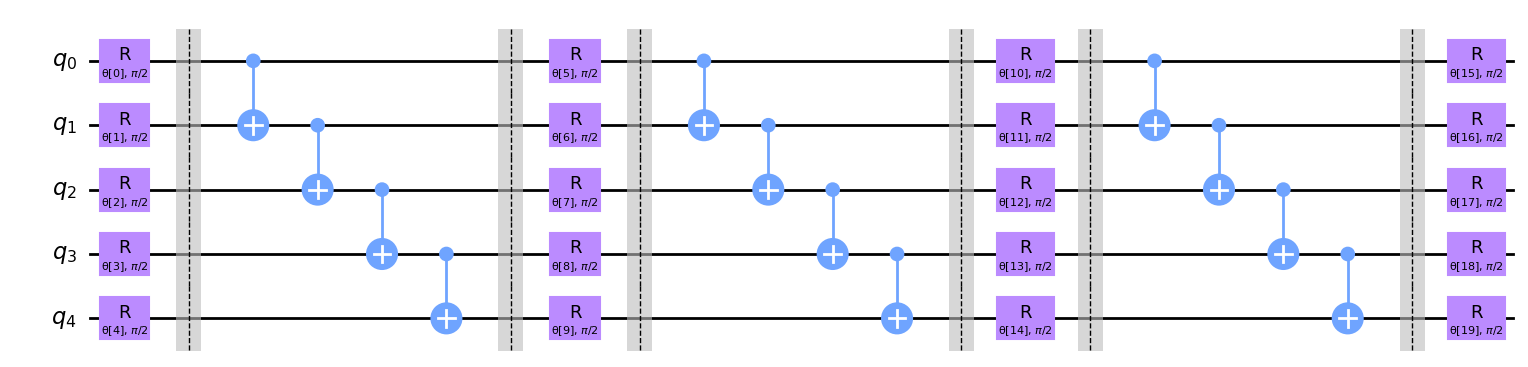

In [ ]:
variational_circuit_circuit =real_amp(num_features,3)
variational_circuit_circuit.decompose().draw(output='mpl', style='clifford')

In [ ]:
cls_opt = COBYLA(maxiter=50, tol=0.001)

In [ ]:
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals))
    , objective_func_vals)
    plt.show()

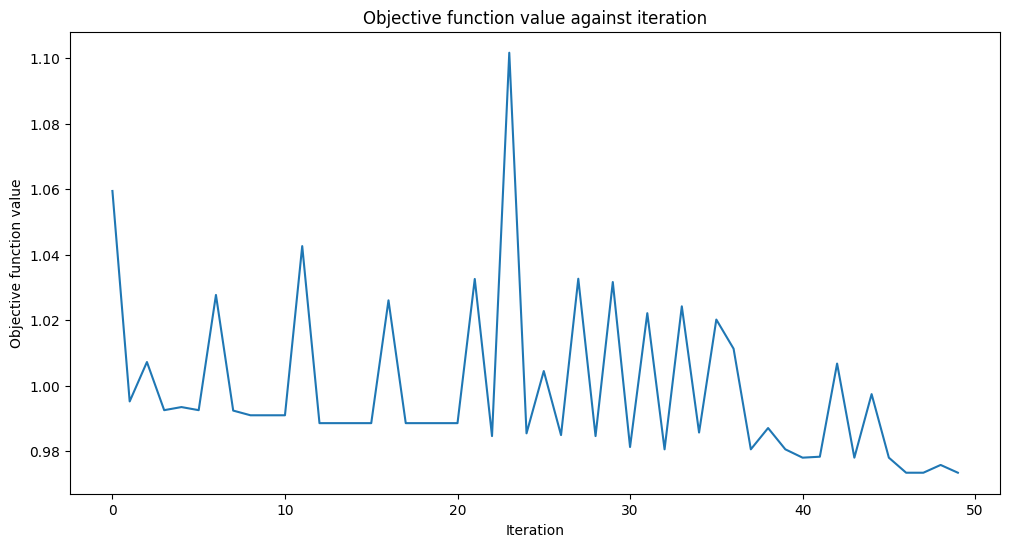

Training time: 966 seconds


In [ ]:
import variational_circuit

# Initialize VQC with the derived number of qubits and the feature map
vqc = VQC(
    sampler = sampler,
    num_qubits = num_qubits,
    feature_map=feature_map_circuit,
    ansatz=variational_circuit_circuit,
    optimizer=cls_opt,
    callback=callback_graph,
    loss='cross_entropy',
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(x_train, y_train)
elapsed = time.time() - start
print(f"Training time: {round(elapsed)} seconds")

In [ ]:
train_score_q2_ra = vqc.score(x_train, y_train)
test_score_q2_ra = vqc.score(x_test, y_test)

print(f"EstimatorQNN on the training dataset using TwoLocal: {train_score_q2_ra:.2f}")
print(f"EstimatorQNN on the test dataset using TwoLocal:     {test_score_q2_ra:.2f}")

EstimatorQNN on the training dataset using TwoLocal: 0.59
EstimatorQNN on the test dataset using TwoLocal:     0.57


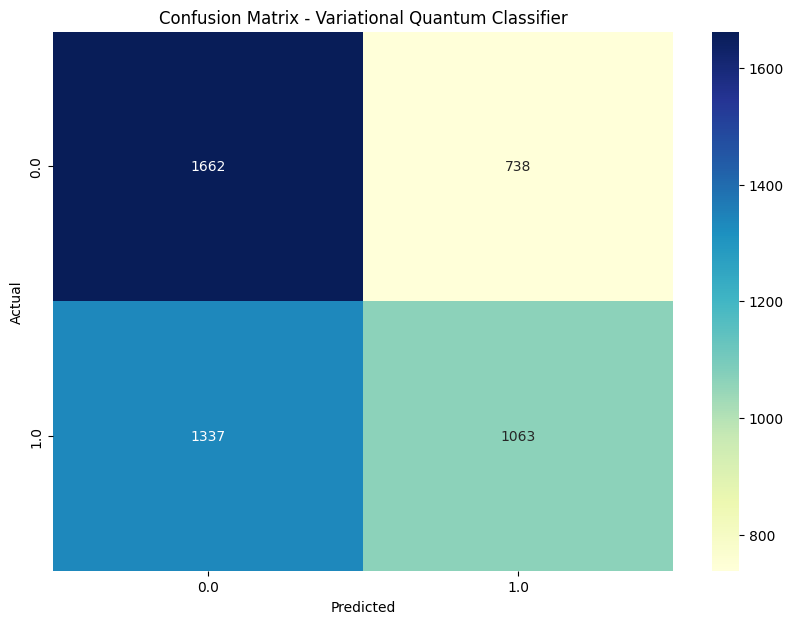

Accuracy = 56.770833333333336
F1 Score = 56.086977588795015


In [ ]:
result = vqc.predict(x_test)

conf_mat = confusion_matrix(y_test, result)


# Use unique values of y_test as index and columns for the confusion matrix DataFrame
df_cm = pd.DataFrame(conf_mat, index=np.unique(y_test), columns=np.unique(y_test))

plt.figure(figsize=(10,7))
sns.heatmap(df_cm, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion Matrix - Variational Quantum Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

vqc_score = accuracy_score(y_test, result) * 100

print('Accuracy =', vqc_score)
print('F1 Score =', f1_score(y_test, result, average='weighted') *  100)
#evaluate_classifier(vqc)